# Convolutional NN su database MNIST

Convolutional neural network sviluppata in TensorFlow 1.x, su database MNIST.


In [0]:
%tensorflow_version 1.x

In [2]:
import tensorflow as tf
from tensorflow import keras as ks

print(tf.__version__)

1.15.0


In [3]:
#Per interoperabilità di Python 2/3
#from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
from numpy import array
from numpy import argmax

import matplotlib.pyplot as plt

import time

import pandas as pd
from sklearn.metrics import confusion_matrix
#Per data visualization
import seaborn as sns

print("Done")

Done


##Definizione metodi

In [4]:
class TimeHistory(ks.callbacks.Callback):
    def on_train_begin(self, logs={}):
        self.times = []

    def on_epoch_begin(self, epoch, logs={}):
        self.epoch_time_start = time.time()

    def on_epoch_end(self, epoch, logs={}):
        self.times.append(time.time() - self.epoch_time_start)

print("Done")

Done


In [5]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

print("Done")

Done


#Import dataset
Import del dataset, e stampa della sua struttura.

In [6]:
#Import del database MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

#Struttura dati nel database
print("Numero elementi e dimensione immagini in train set: " + str(train_images.shape))
print("Numero elementi e dimensione immagini in test set: " + str(test_images.shape))
print("Numero elementi label in train set: " + str(len(train_labels)))
print("Numero elementi label in test set: " + str(len(test_labels)))
print("Tipo di struttura del train set: " + str(type(train_images)) + ", composto da " + str(type(train_images[0])))
print("Tipo di struttura del label set: " + str(type(train_labels)) + ", composto da " + str(type(train_labels[0])))
print("Le etichette sono interi; valore più piccolo: " + str(np.amin(train_labels)) + ", valore più grande: " + str(np.amax(train_labels)))

11493376/11490434 [==============================] - 0s 0us/step
Numero elementi e dimensione immagini in train set: (60000, 28, 28)
Numero elementi e dimensione immagini in test set: (10000, 28, 28)
Numero elementi label in train set: 60000
Numero elementi label in test set: 10000
Tipo di struttura del train set: <class 'numpy.ndarray'>, composto da <class 'numpy.ndarray'>
Tipo di struttura del label set: <class 'numpy.ndarray'>, composto da <class 'numpy.uint8'>
Le etichette sono interi; valore più piccolo: 0, valore più grande: 9


##Preprocessing dei dati
Oltre a scalare le immagini, le trasformo in matrici.

In [0]:
#Preprocessing dei dati
#Scalo i valori nel range tra 0 e 1
train_images = train_images / 255.0

test_images = test_images / 255.0

Reshape dei dati in matrici 28x28x1.

In [8]:
train_images = train_images.reshape((60000, 28, 28, 1))
test_images = test_images.reshape((10000, 28, 28, 1))

print("Training dataset shape: {}".format(train_images.shape))

Training dataset shape: (60000, 28, 28, 1)


#Costruzione modello
Costruisco il modello convoluzionale.

Piccola spiegazione del pooling e della costruzione di modelli convoluzionali: [pooling](https://machinelearningmastery.com/pooling-layers-for-convolutional-neural-networks/).

##Build

In [9]:
cnn_model = ks.models.Sequential()
#Padding: same
#Significa zero padding
cnn_model.add(ks.layers.Conv2D(64, (5, 5), activation = 'relu',
                               input_shape=(28, 28, 1), name='Conv2D_layer1'))
cnn_model.add(ks.layers.Conv2D(32, (3, 3), activation = 'relu',
                               input_shape=(28, 28, 1), name='Conv2D_layer2'))
cnn_model.add(ks.layers.MaxPooling2D((2, 2), name = 'Maxpooling_2D'))
cnn_model.add(ks.layers.Flatten(name = 'Flatten'))
cnn_model.add(ks.layers.Dense(64, activation = 'relu', name = 'Hidden_layer'))
#L'ultimo layer avrà sempre numero nodi pari alle categorie da identificare
cnn_model.add(ks.layers.Dense(10, activation = 'softmax', name = 'Output_layer'))

cnn_model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Conv2D_layer1 (Conv2D)       (None, 24, 24, 64)        1664      
_________________________________________________________________
Conv2D_layer2 (Conv2D)       (None, 22, 22, 32)        18464     
_________________________________________________________________
Maxpooling_2D (MaxPooling2D) (None, 11, 11, 32)        0         
_________________________________________________________________
Flatten (Flatten)            (None, 3872)              0         
_________________________________________________________________
Hidden_layer (Dense)         (None, 64)                247872    
_________________________________________________________________
Output_layer (Dense)         (None, 10)                650       
Total params: 268,650
Trainable params: 2

##Compile

In [10]:
cnn_model.compile(optimizer = 'adam', 
                  loss = 'sparse_categorical_crossentropy',
                  metrics = ['accuracy'])

print("Done")

Done


##Training

In [11]:
time_callback = TimeHistory()

#Training
hist = cnn_model.fit(train_images, train_labels, 
                     validation_data=(test_images, test_labels), 
                     epochs = 3, callbacks=[time_callback])

print("Done")

Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 154s 3ms/sample - loss: 0.1292 - acc: 0.9603 - val_loss: 0.0559 - val_acc: 0.9819
Epoch 2/3
60000/60000 [==============================] - 152s 3ms/sample - loss: 0.0451 - acc: 0.9863 - val_loss: 0.0432 - val_acc: 0.9851
Epoch 3/3
60000/60000 [==============================] - 150s 3ms/sample - loss: 0.0319 - acc: 0.9905 - val_loss: 0.0342 - val_acc: 0.9888
Done


In [12]:
#Misuro accuratezza
test_accuracy = cnn_model.evaluate(test_images, test_labels)

print("Accuratezza: " + str(test_accuracy))
print("Done")

10000/10000 [==============================] - 6s 557us/sample - loss: 0.0342 - acc: 0.9888
Accuratezza: [0.03424158912872081, 0.9888]
Done


Visualizzo l'accuratezza con un grafo (dove si nota overfitting).

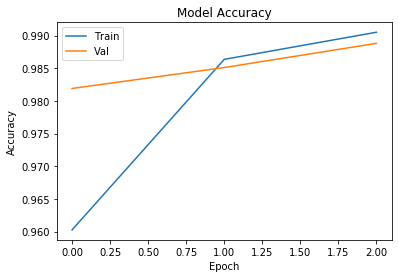

Time per epoch: [153.51917815208435, 152.37644982337952, 150.0890018939972]
Total time: 455.98462986946106


In [13]:
#Visualize the models accuracy
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

print("Time per epoch: " + str(time_callback.times))
total_time = time_callback.times
total_time_str = sum(total_time)
print("Total time: " + str(total_time_str))

#Risultati

Sia il modello:



```
cnn_model = ks.models.Sequential()
cnn_model.add(ks.layers.Conv2D(64, (3, 3), activation = 'relu',
                               input_shape=(28, 28, 1), name='Conv2D_layer1'))
cnn_model.add(ks.layers.Conv2D(32, (3, 3), activation = 'relu',
                               input_shape=(28, 28, 1), name='Conv2D_layer2'))
cnn_model.add(ks.layers.MaxPooling2D((2, 2), name = 'Maxpooling_2D'))
cnn_model.add(ks.layers.Flatten(name = 'Flatten'))
cnn_model.add(ks.layers.Dense(64, activation = 'relu', name = 'Hidden_layer'))
#L'ultimo layer avrà sempre numero nodi pari alle categorie da identificare
cnn_model.add(ks.layers.Dense(10, activation = 'softmax', name = 'Output_layer'))
```


I risultati sono i seguenti:

Train on 60000 samples, validate on 10000 samples

Epoch 1/3
60000/60000 [==============================] - 181s 3ms/sample - loss: 0.1207 - acc: 0.9634 - val_loss: 0.0411 - val_acc: 0.9859

Epoch 2/3
60000/60000 [==============================] - 181s 3ms/sample - loss: 0.0417 - acc: 0.9872 - val_loss: 0.0446 - val_acc: 0.9859

Epoch 3/3
60000/60000 [==============================] - 181s 3ms/sample - loss: 0.0275 - acc: 0.9910 - val_loss: 0.0386 - val_acc: 0.9876

Time per epoch: [181.145183801651, 180.76055026054382, 181.38399505615234]

Total time: 543.2897291183472

===

Sia invece il modello:

```
cnn_model = ks.models.Sequential()
#Padding: same
#Significa zero padding
cnn_model.add(ks.layers.Conv2D(64, (5, 5), activation = 'relu',
                               input_shape=(28, 28, 1), name='Conv2D_layer1'))
cnn_model.add(ks.layers.Conv2D(32, (3, 3), activation = 'relu',
                               input_shape=(28, 28, 1), name='Conv2D_layer2'))
cnn_model.add(ks.layers.MaxPooling2D((2, 2), name = 'Maxpooling_2D'))
cnn_model.add(ks.layers.Flatten(name = 'Flatten'))
cnn_model.add(ks.layers.Dense(64, activation = 'relu', name = 'Hidden_layer'))
#L'ultimo layer avrà sempre numero nodi pari alle categorie da identificare
cnn_model.add(ks.layers.Dense(10, activation = 'softmax', name = 'Output_layer'))

cnn_model.summary()
```

I risultati sono i seguenti:
Train on 60000 samples, validate on 10000 samples

Epoch 1/3
60000/60000 [==============================] - 161s 3ms/sample - loss: 0.1193 - acc: 0.9638 - val_loss: 0.0420 - val_acc: 0.9871

Epoch 2/3
60000/60000 [==============================] - 161s 3ms/sample - loss: 0.0407 - acc: 0.9878 - val_loss: 0.0339 - val_acc: 0.9888

Epoch 3/3
60000/60000 [==============================] - 161s 3ms/sample - loss: 0.0273 - acc: 0.9915 - val_loss: 0.0372 - val_acc: 0.9877

Time per epoch: [161.44391417503357, 161.48330283164978, 161.0783212184906]

Total time: 484.00553822517395

===

Sia infine il seguente modello:

```
cnn_model = ks.models.Sequential()
#Padding: same
#Significa zero padding
cnn_model.add(ks.layers.Conv2D(64, (5, 5), activation = 'relu',
                               input_shape=(28, 28, 1), name='Conv2D_layer1',
                               padding = 'same'))
cnn_model.add(ks.layers.Conv2D(32, (3, 3), activation = 'relu',
                               input_shape=(28, 28, 1), name='Conv2D_layer2',
                               padding = 'same'))
cnn_model.add(ks.layers.MaxPooling2D((2, 2), name = 'Maxpooling_2D'))
cnn_model.add(ks.layers.Flatten(name = 'Flatten'))
cnn_model.add(ks.layers.Dense(64, activation = 'relu', name = 'Hidden_layer'))
#L'ultimo layer avrà sempre numero nodi pari alle categorie da identificare
cnn_model.add(ks.layers.Dense(10, activation = 'softmax', name = 'Output_layer'))

cnn_model.summary()
```

I risultati sono i seguenti:

Train on 60000 samples, validate on 10000 samples

Epoch 1/3
60000/60000 [==============================] - 243s 4ms/sample - loss: 0.1218 - acc: 0.9623 - val_loss: 0.0486 - val_acc: 0.9843

Epoch 2/3
60000/60000 [==============================] - 243s 4ms/sample - loss: 0.0446 - acc: 0.9862 - val_loss: 0.0432 - val_acc: 0.9869

Epoch 3/3
60000/60000 [==============================] - 244s 4ms/sample - loss: 0.0296 - acc: 0.9905 - val_loss: 0.0432 - val_acc: 0.9862

Time per epoch: [242.88430094718933, 243.16734552383423, 243.57096242904663]

Total time: 729.6226089000702

##Matrice di confusione

Genero la matrice di confusione sul test set.

In [14]:
#Necessito di un array con tutte le labels
classes=[0,1,2,3,4,5,6,7,8,9]

test_predictions = cnn_model.predict_classes(test_images)

conf_matr = confusion_matrix(y_true = test_labels, y_pred = test_predictions)
print(conf_matr)

con_mat_norm = np.around(conf_matr.astype('float') / conf_matr.sum(axis=1)[:, np.newaxis], decimals=2)

con_mat_df = pd.DataFrame(con_mat_norm,
                          index = classes, 
                          columns = classes)

[[ 978    0    1    0    0    0    1    0    0    0]
 [   1 1133    0    0    0    1    0    0    0    0]
 [   2    4 1017    0    6    0    0    1    2    0]
 [   0    0    2  998    0    5    0    2    2    1]
 [   0    0    0    0  978    0    2    0    0    2]
 [   2    1    0    4    0  873    7    0    5    0]
 [   2    4    0    0    4    1  945    0    2    0]
 [   0    3    8    0    3    0    0 1011    1    2]
 [   2    1    1    0    1    0    1    0  967    1]
 [   3    0    0    0   10    0    0    1    7  988]]


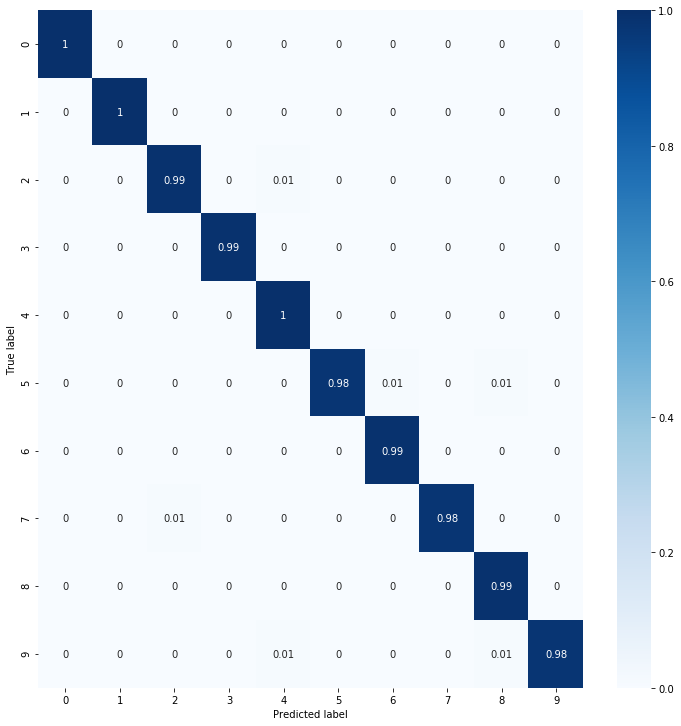

In [15]:
figure = plt.figure(figsize=(10, 10))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

#Predizioni

In [16]:
#Show predictions as probabilites for the first 4 images in the test set
predictions = cnn_model.predict(test_images[:4])
predictions

array([[6.9915068e-08, 4.0208850e-08, 8.4654664e-07, 1.0168034e-05,
        1.0390619e-08, 1.0671348e-08, 4.9443579e-12, 9.9998844e-01,
        2.4423713e-07, 2.2125607e-07],
       [5.8912545e-05, 3.5290046e-05, 9.9990237e-01, 1.9324333e-09,
        3.1845039e-07, 1.2772013e-10, 1.2275349e-06, 1.0639164e-06,
        8.1567936e-07, 8.7031424e-12],
       [3.7206098e-09, 9.9999595e-01, 1.6722184e-06, 3.0242171e-09,
        7.5877858e-07, 5.3585190e-08, 9.1239315e-08, 9.8718161e-08,
        1.4754954e-06, 5.9347540e-09],
       [9.9987304e-01, 2.1817975e-10, 5.0289355e-08, 1.9397659e-09,
        1.2743833e-07, 5.4564218e-08, 4.0734711e-05, 8.5882224e-05,
        1.9524644e-09, 6.4880339e-08]], dtype=float32)

In [17]:
#Print our predictions as number labels for the first 4 images
print( np.argmax(predictions, axis=1))
#Print the actual labels
print(test_labels[:4])

[7 2 1 0]
[7 2 1 0]


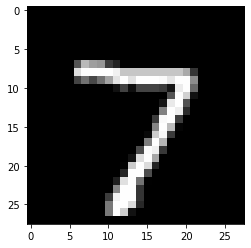

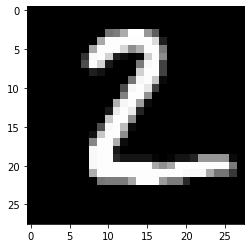

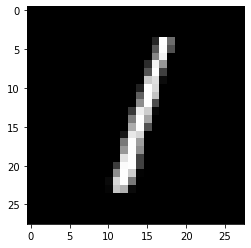

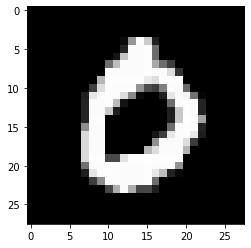

In [18]:
#Show the first 4 images as pictures
for i in range(0,4):
  image = test_images[i]
  image = np.array(image, dtype='float')
  pixels = image.reshape((28,28))
  plt.imshow(pixels, cmap='gray')
  plt.show()